# ⚡️study by 석민⚡️

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import os

In [2]:
os.getcwd()

'/Users/seokminlee/Desktop/mose/zero-base/스터디노트/5주차'

In [3]:
# 폰트 깨짐 방지
import matplotlib.pyplot as plt  # matplotlib 설치시 혹은 터미널 시작시, 1번과 2번, 3번 명령어 입력으로 폰트깨짐 해결.(Mac 한정.)
from matplotlib import rc        # 1번
rc('font', family='AppleGothic') # 2번 #Arial Unicode MS , AppleGothic
plt.rcParams['axes.unicode_minus'] = False # 3번

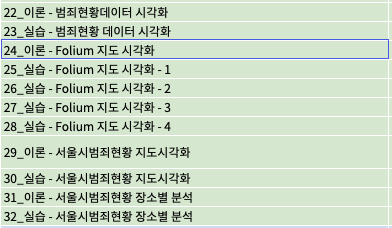

# 범죄현황 데이터 시각화

In [48]:
crime_anal_norm = pd.read_csv("../ds_study/unit2/data/crime_anal_norm.csv", index_col = 0, encoding = "utf-8")
crime_anal_norm.head()

,강간,강도,살인,절도,폭력,강간검거율,강도검거율,살인검거율,절도검거율,폭력검거율,인구수,CCTV,범죄,검거
구별,,,,,,,,,,,,,,
강남구,1.000000,1.000000,0.357143,0.977118,0.733773,80.038760,100.000000,100.000000,53.470867,88.130935,561052,3238,0.813607,84.328112
강동구,0.310078,0.358974,0.285714,0.477799,0.463880,95.000000,92.857143,100.000000,51.425314,86.996047,440359,1010,0.379289,85.255701
강북구,0.420543,0.128205,0.500000,0.332879,0.509351,73.271889,80.000000,85.714286,54.991817,89.344852,328002,831,0.378196,76.664569
관악구,0.963178,0.487179,0.857143,0.917189,0.995233,81.891348,89.473684,100.000000,47.252747,85.722181,520929,2109,0.843984,80.867992
광진구,0.540698,0.282051,0.285714,0.718060,0.438577,83.870968,54.545455,100.000000,40.098634,84.071906,372298,878,0.453020,72.517393


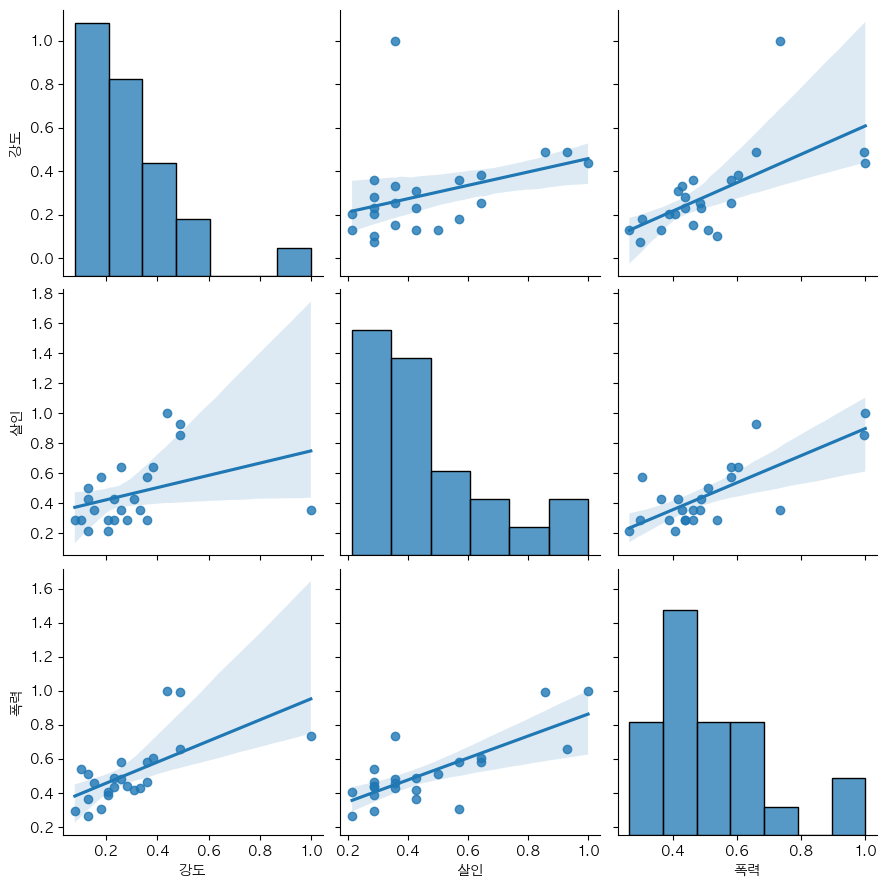

In [52]:
sns.pairplot(crime_anal_norm, vars = ["강도", "살인", "폭력"], kind = "reg",height = 3)
plt.show()

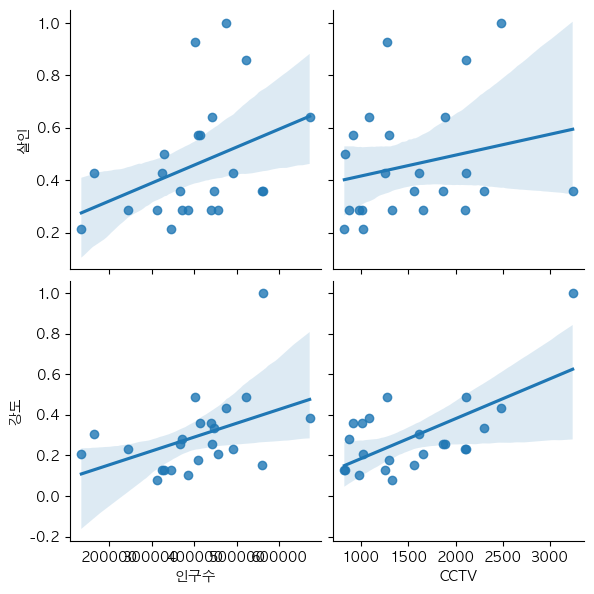

In [25]:
def draw_plot():
    # 인구수, CCTV와 살인, 강도와의 관계
    sns.pairplot(
    crime_anal_norm, x_vars = ["인구수", "CCTV"], y_vars = ["살인", "강도"], kind = "reg", height = 3)
    plt.show()
    
draw_plot()

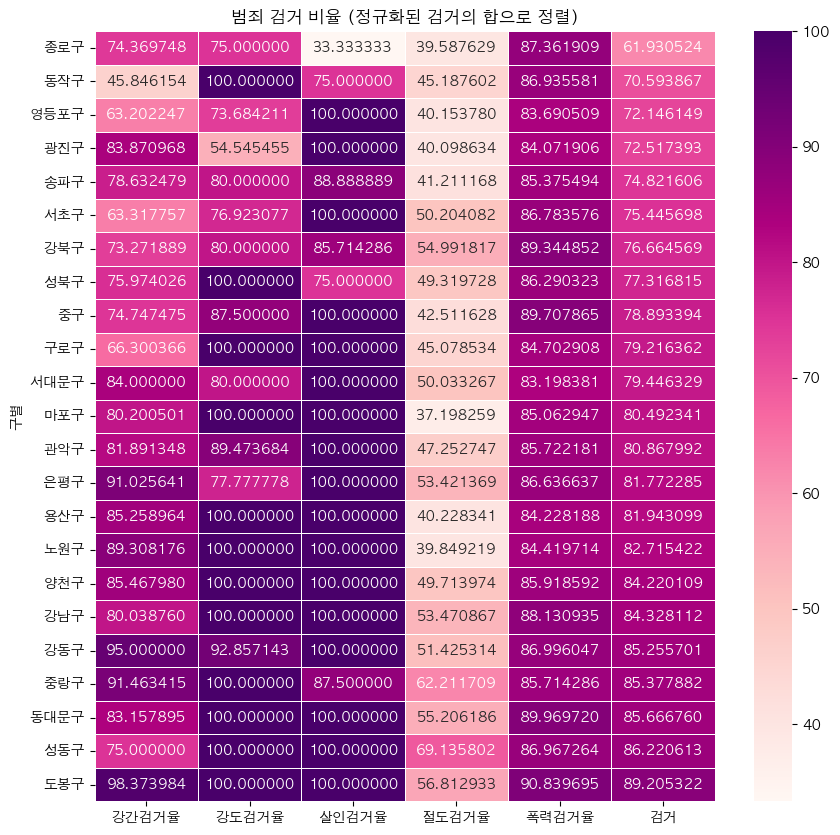

In [26]:
def draw_graph():
    target_col = ["강간검거율", "강도검거율", "살인검거율", "절도검거율", "폭력검거율", "검거"]
    crime_anal_norm_sort = crime_anal_norm.sort_values("검거", ascending = True)
    
    plt.figure(figsize = (10, 10))
    sns.heatmap(crime_anal_norm_sort[target_col],
               annot = True,
               fmt = "f",
               linewidth = 0.5,
               cmap = "RdPu")
    
    plt.title("범죄 검거 비율 (정규화된 검거의 합으로 정렬)")
    plt.show()
    
draw_graph()

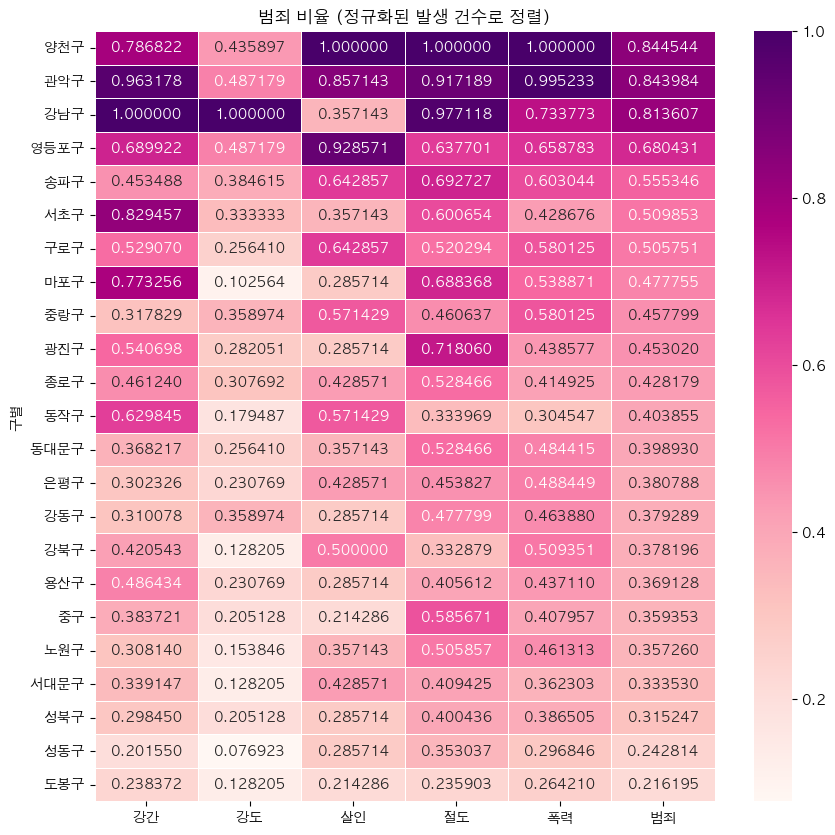

In [27]:
def draw_graph():
    target_col = ["강간", "강도", "살인", "절도", "폭력", "범죄"]
    crime_anal_norm_sort = crime_anal_norm.sort_values("범죄", ascending = False)
    
    plt.figure(figsize = (10, 10))
    sns.heatmap(crime_anal_norm_sort[target_col],
               annot = True,
               fmt = "f",
               linewidths = 0.5,
               cmap = "RdPu")
    
    
    plt.title("범죄 비율 (정규화된 발생 건수로 정렬)")
    plt.show()
    
draw_graph()

In [28]:
crime_anal_norm.to_csv(
    "../ds_study/unit2/data/02. crime_in_Seoul_final(이석민).csv",
    sep = ",", encoding = "utf-8")

### 📍 Folium
- Folium은 Python의 라이브러리로, 지도를 생성하고 지도 위에 데이터를 시각화하는데 사용됩니다. 
- 이 라이브러리는 Leaflet.js 라이브러리를 기반으로 하며, Python과 연동하여 사용할 수 있도록 설계되었습니다.
~~~pip
pip install folium
~~~
~~~python
import folium
# 지도를 생성하고, 중심 위치와 초기 확대 수준을 설정합니다.
map = folium.Map(location=[latitude, longitude], zoom_start=12)

# 마커를 생성하고, 해당 마커에 팝업 텍스트를 추가합니다.
folium.Marker([latitude, longitude], popup='Your Text').add_to(map)
~~~
- Folium은 인터랙티브한 시각화를 만들 수 있어서 웹 페이지에 임베드하거나, Jupyter Notebook에서 직접 보여줄 수 있습니다. 
- 이 외에도 Folium은 Choropleth 지도(지역별 통계 데이터를 색상으로 표현한 지도)를 생성하는 등의 고급 기능을 제공합니다.

In [29]:
import folium

In [30]:
m = folium.Map(location = [45.5236, -122.6750])
m

In [31]:
# 지도를 html로 저장 가능
m.save("../ds_study/unit2/data/index.html")

In [32]:
ls ../ds_study/unit2/data/

02. US_Unemployment_Oct2012.csv
02. crime_in_Seoul.csv
02. crime_in_Seoul_1st.csv
02. crime_in_Seoul_final(이석민).csv
02. crime_in_Seoul_final.csv
02. crime_in_Seoul_location.csv
02. crime_in_Seoul_raw.csv
02. sales-funnel.xlsx
02. skorea_municipalities_geo_simple.json
02. us-states.json
02. 서울특별시 동작구_주택유형별 위치 정보 및 세대수 현황_20210825.csv
crime_anal_norm.csv
index.html


In [33]:
# 스타일을 tiles 옵션으로 지정
folium.Map(location = [45.5236, -122.6750], tiles = "Stamen Toner", zoom_start = 13)

In [34]:
# 마커 추가
my_map = folium.Map(location = [45.372, -121.6972], tiles = "Stamen Terrain", zoom_start = 12)

folium.Marker([45.3288, -121.6625], popup = "<i>Mt. Hood Meadows</i>").add_to(my_map)
folium.Marker([45.3311, -121.7113], popup = "<b>Timberline Lodge</b>").add_to(my_map)

In [35]:
my_map

In [36]:
# 다양한 아이콘 지원
m = folium.Map(location = [45.372, -121.6972], start_size = 12, tiles = "Stamen Terrain")
folium.Marker(location = [45.3288, -121.6625],
             popup = "Mt. Hood Meadows",
             icon = folium.Icon(icon = "cloud")).add_to(m)
folium.Marker(location = [45.3311, -121.7113],
             popup = "Timberline Lodge",
             icon = folium.Icon(color = "green")).add_to(m)
folium.Marker(location = [45.3300, -121.6823],
             popup = "한글 테스트",
             icon = folium.Icon(color = "red", icon = "info-sign")).add_to(m)

In [37]:
m

In [38]:
# Circle 마커
# folium.Circle, folium.CircleMarker()
m = folium.Map(location=[45.5236, -122.6750], tiles="Stamen Toner", zoom_start=13)
folium.Circle(
    radius=100,
    location=[45.5244, -122.6699],
    popup="The Waterfront",
    color="crimson",
    fill=False).add_to(m)
folium.CircleMarker(
    location=[45.5215, -122.6261],
    radius=50,
    popup="Laurelhurst Park",
    color="#3186cc",
    fill=True,
    fill_color="#3186cc").add_to(m)
m

In [39]:
# map.add_child(folium.LatLngPopup()): 클릭 시 위동 경도 정보를 반환
m = folium.Map(location=[46.1991, -122.1889], tiles="Stamen Terrain", zoom_start=13)
m.add_child(folium.LatLngPopup())
m

### 📍 folium.Choropleth( )
- m.choropleth()은 Folium 라이브러리에서 제공하는 함수로서, 코로플레스(choropleth) 맵을 만드는데 사용됩니다. 
- 코로플레스 맵은 지리적 영역에 대한 정보를 색상으로 표현한 지도입니다. 
- 이를 통해 특정 지역의 통계치, 인구 밀도 등의 정보를 직관적으로 시각화할 수 있습니다.


>- geo_data: 지리적 영역의 경계를 나타내는 데이터입니다. GeoJSON, TopoJSON, WKT 등 다양한 형식을 지원합니다.
>- data: 코로플레스 맵에 표현할 실제 데이터입니다. Pandas DataFrame 형태의 데이터를 사용할 수 있습니다.
>- columns: DataFrame에서 사용할 열의 이름입니다. 첫 번째 열은 지리적 영역을, 두 번째 열은 해당 영역의 값(value)을 나타냅니다.
>- key_on: geo_data에서 지리적 영역의 이름을 가져오는 데 사용되는 키입니다.
>- fill_color: 지도의 색상 팔레트입니다. 기본값은 'blue'입니다.
>- fill_opacity와 line_opacity: 각각 영역의 채움 색상과 선 색상의 투명도를 설정합니다.
>- legend_name: 범례의 이름입니다.

In [40]:
import json

state_data = pd.read_csv("../ds_study/unit2/data/02. US_Unemployment_Oct2012.csv")
m = folium.Map(location=[48, -102], zoom_start=3)
folium.Choropleth( # m.choropleth는 이전버전임
    geo_data = "../ds_study/unit2/data/02. us-states.json",
    data = state_data,
    columns = ["State", "Unemployment"],
    key_on = "feature.id",
    fill_color = "YlGn",
    fill_opacity = 0.7,
    line_opacity = 0.2,
    legend_name = "Unemployment Rate(%)").add_to(m)
m

# 서울시 범죄 현황에 대한 지도 시각화

In [41]:
# 범죄율에 대한 지도 시각화
import json

pd.read_csv("../ds_study/unit2/data/02. crime_in_Seoul_final.csv", 
            index_col = 0, encoding = "utf-8")
geo_path = "../ds_study/unit2/data/02. skorea_municipalities_geo_simple.json"
geo_str = json.load(open(geo_path, encoding = "utf-8"))

In [42]:
# 정규화된 살인 발생 건수
my_map = folium.Map(location=[37.5502, 126.982], tiles = "Stamen Toner", zoom_start = 11)

folium.Choropleth(
    geo_data = geo_str,
    data = crime_anal_norm["살인"],
    columns = [crime_anal_norm.index, crime_anal_norm["살인"]],
    fill_color = "PuRd",
    key_on = "feature.id",
    fill_opacity = 0.7,
    line_opacity = 0.2,
    legend_name = "정규화된 살인 발생 건수"
).add_to(my_map)

my_map

In [43]:
# 인구 대비 범죄 발생 건수
tmp_criminal = crime_anal_norm["범죄"] / crime_anal_norm["인구수"]

my_map = folium.Map(location = [37.5502, 126.982], zoom_start = 11, tiles = "Stamen Toner")

folium.Choropleth(
    geo_data = geo_str,
    data = tmp_criminal,
    columns = [crime_anal_norm.index, tmp_criminal],
    fill_color = "PuRd",
    key_on = "feature.id",
    fill_opacity = 0.7,
    line_opacity = 0.2,
    legend_name = "정규화된 범죄 발생 건수"
).add_to(my_map)

my_map

In [44]:
crime_anal_station = pd.read_csv(
    "../ds_study/unit2/data/02. crime_in_Seoul_1st.csv",
    index_col = 0, encoding = "utf-8")
col = ["강간검거", "강도검거", "살인검거", "절도검거", "폭력검거"]
# tmp 이 결과는 0과 1 사이의 값이 될 것이며, 
# 이는 각 범죄의 검거율을 해당 범죄의 최대 검거율에 비례하는 값으로 정규화(normalize)한 결과를 나타냅니다.
tmp = crime_anal_station[col] / crime_anal_station[col].max()
crime_anal_station["검거"] = np.mean(tmp, axis = 1)
crime_anal_station.head()

,구분,강간검거,강간발생,강도검거,강도발생,살인검거,살인발생,절도검거,절도발생,폭력검거,폭력발생,구별,lat,lng,검거
0,강남,269.0,339.0,26.0,24.0,3.0,3.0,1129.0,2438.0,2096.0,2336.0,강남구,37.509435,127.066958,0.753687
1,강동,152.0,160.0,13.0,14.0,5.0,4.0,902.0,1754.0,2201.0,2530.0,강동구,37.528511,127.126822,0.578102
2,강북,159.0,217.0,4.0,5.0,6.0,7.0,672.0,1222.0,2482.0,2778.0,강북구,37.637388,127.027324,0.506577
3,강서,239.0,275.0,10.0,10.0,10.0,9.0,1070.0,1952.0,2768.0,3204.0,강서구,37.539783,126.829997,0.753796
4,관악,264.0,322.0,10.0,12.0,7.0,6.0,937.0,2103.0,2707.0,3235.0,관악구,37.474379,126.950975,0.695650


In [45]:
# 경찰서 위치를지도에 표시
my_map = folium.Map(location = [37.5502, 126.982], zoom_start = 11)

for idx, rows in crime_anal_station.iterrows():
    folium.Marker([rows["lat"], rows["lng"]]).add_to(my_map)
    
my_map

In [46]:
# 검거에 적절한 값을 곱해서 원의 넓이로 사용
my_map = folium.Map(location = [37.5502, 126.982], zoom_start = 11)

for idx, rows in crime_anal_station.iterrows():
    folium.CircleMarker(
        [rows["lat"], rows["lng"]],
        radius = rows["검거"] * 50,
        popup = rows["구분"] + " : " + "%.2f" % rows["검거"],
        color = "#3186cc",
        fill = True,
        fill_color = "#3186cc").add_to(my_map)
my_map

In [47]:
my_map = folium.Map(location = [37.5502, 126.982], zoom_start = 11)

folium.Choropleth(
    geo_data = geo_str,
    data = crime_anal_norm["범죄"],
    columns = [crime_anal_norm.index, crime_anal_norm["범죄"]],
    fill_color = "PuRd",
    key_on = "feature.id",
    fill_opacity = 0.7,
    line_opacity = 0.2).add_to(my_map)

for idx, rows in crime_anal_station.iterrows():
    folium.CircleMarker(
            [rows["lat"], rows["lng"]],
            radius = rows["검거"] * 50,
            popup = rows["구분"] + " : " + "%.2f" % rows["검거"],
            color = "#3186cc",
            fill = True,
            fill_color = "#3186cc").add_to(my_map)
my_map

# 서울시 범죄 현황 발생 장소 분석

In [61]:
os.getcwd()

'/Users/seokminlee/Desktop/mose/zero-base/스터디노트/5주차'

In [63]:
crime_loc_raw = pd.read_csv(
    "../ds_study/unit2/data/02. crime_in_Seoul_location.csv", 
    thousands=",", encoding="euc-kr")
crime_loc_raw.head()

,범죄명,장소,발생건수
0,살인,"아파트, 연립 다세대",12
1,살인,단독주택,30
2,살인,노상,22
3,살인,상점,1
4,살인,"숙박업소, 목욕탕",4


In [64]:
crime_loc_raw["범죄명"].unique()

array(['살인', '강도', '강간.추행', '절도', '폭력'], dtype=object)

In [65]:
crime_loc_raw["장소"].unique()

array(['아파트, 연립 다세대', '단독주택', '노상', '상점', '숙박업소, 목욕탕', '유흥 접객업소', '사무실',
       '역, 대합실', '교통수단', '유원지 ', '학교', '금융기관', '기타'], dtype=object)

In [81]:
crime_loc = crime_loc_raw.pivot_table(
    crime_loc_raw, index = "장소", 
    columns = "범죄명", aggfunc = np.sum)
crime_loc.head()

발생건수                      
범죄명  강간.추행  강도  살인     절도     폭력
장소                              
교통수단   691   0   0    457    222
금융기관     2   1   1   1081     42
기타    2128  67  65  21734  26382
노상     986  87  22   9329  24535
단독주택   395  15  30   2241   3579

In [82]:
crime_loc.columns = crime_loc.columns.droplevel([0])

In [83]:
crime_loc.head()

범죄명,강간.추행,강도,살인,절도,폭력
장소,,,,,
교통수단,691,0,0,457,222
금융기관,2,1,1,1081,42
기타,2128,67,65,21734,26382
노상,986,87,22,9329,24535
단독주택,395,15,30,2241,3579


In [87]:
col = ["살인", "강도", "강간", "절도", "폭력"]
crime_loc_norm = crime_loc / crime_loc.max()
crime_loc_norm["종합"] = np.mean(crime_loc_norm, axis = 1)

In [89]:
crime_loc_norm.head()

범죄명,강간.추행,강도,살인,절도,폭력,종합
장소,,,,,,
교통수단,0.324718,0.000000,0.000000,0.021027,0.008415,0.070832
금융기관,0.000940,0.011494,0.015385,0.049738,0.001592,0.015830
기타,1.000000,0.770115,1.000000,1.000000,1.000000,0.954023
노상,0.463346,1.000000,0.338462,0.429235,0.929990,0.632207
단독주택,0.185620,0.172414,0.461538,0.103110,0.135661,0.211669


In [93]:
crime_loc_norm_sort = crime_loc_norm.sort_values("종합", ascending = False)

def draw_graph():
    plt.figure(figsize = (8, 8))
    sns.heatmap(crime_loc_norm_sort, annot = True, fmt = "f", linewidths= 0.5, cmap = "RdPu")
    plt.title("범죄와 발생 장소")
    plt.show()

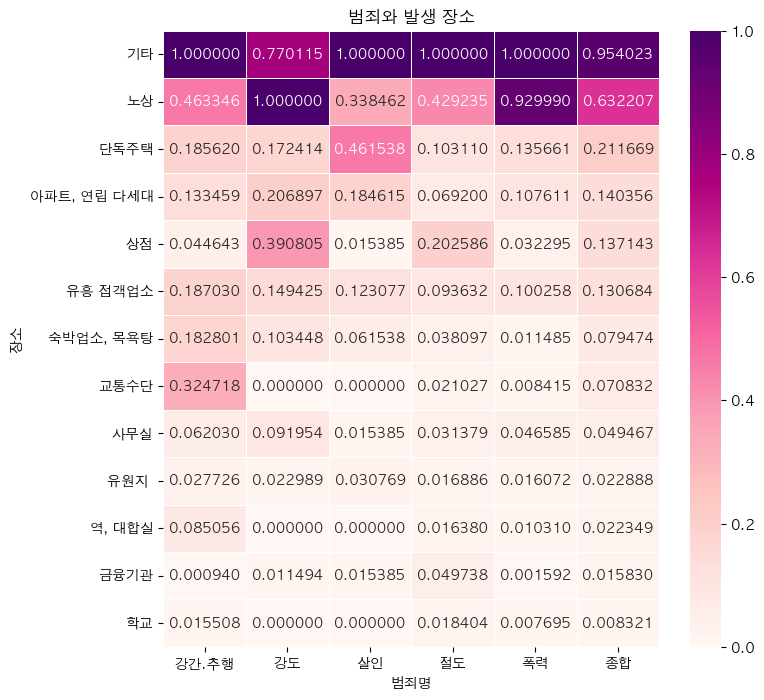

In [94]:
draw_graph()